#### Exportando a planilha com dados da rede importada no Gephi para identificar os nós da rede que formam o maior core e o shell da rede.

In [ ]:
!pip install osmnx

In [ ]:
import networkx as nx
import pandas as pd
import osmnx as ox

In [ ]:
try:
  nw = pd.read_csv('network_edges.csv')
  print(nw)
except FileNotFoundError:
  print("Error: 'network.csv' not found. Please upload the file to your Colab environment.")

try:
  datasheet = pd.read_csv('network_nodes.csv')
  print(datasheet)
except FileNotFoundError:
  print("Error: 'network_nodes.csv' not found. Please upload the file to your Colab environment.")


            Source       Target      Type     Id  Label  Weight  3  4
0      57194772911  56573569700  Directed      0    NaN       1  1  5
1      57194772911   7004474343  Directed      1    NaN       1  1  5
2      57194772911  57197124623  Directed      2    NaN       1  1  5
3      57194772911  57216525112  Directed      3    NaN       1  1  5
4       7004474343  57197124623  Directed      4    NaN       1  1  5
...            ...          ...       ...    ...    ...     ... .. ..
11153  58798933600  58827009200  Directed  11153    NaN       1  1  0
11154  58827009200  58825885400  Directed  11154    NaN       1  1  0
11155  58827009200  57644977600  Directed  11155    NaN       1  1  0
11156  57644977600  58825885400  Directed  11156    NaN       1  1  0
11157  59158369800   6603222705  Directed  11157    NaN       1  1  0

[11158 rows x 8 columns]
               Id        Label                                    0   1  \
0     57194772911  57194772911          Samanta Mesquita de

In [ ]:
# Create a graph from the 'Id' column of the datasheet
graph = nx.Graph()
graph.add_nodes_from(datasheet['Id'])

# You can now work with the 'graph_datasheet' object
graph.nodes

NodeView((57194772911, 7004474343, 56573569700, 57216525112, 57197124623, 56816369000, 55908415500, 57382309000, 57216582037, 57194409673, 36441595100, 57897646900, 6603844872, 6701515542, 57189465559, 57218290128, 57188984235, 56884762100, 57213001300, 57219119640, 59158003100, 58869643200, 57217246368, 57188987415, 57226766436, 58896413200, 57212392334, 58895988900, 57226270936, 6603647208, 57226283044, 57222580164, 57210842815, 58728864100, 59152883300, 16309023400, 57194409298, 57222577631, 58546580100, 58066046100, 57983867100, 7102618949, 11340128700, 7004527155, 55600716600, 57223368591, 25626729300, 57700480600, 6506177045, 55103744400, 40462477300, 55317626700, 35606294400, 57226123657, 25626432200, 8570162800, 55826531700, 58201932000, 57735564000, 57454497300, 56717204100, 57202810878, 57694054600, 57195063277, 57220480392, 55513131300, 57208330857, 59276747600, 56022953900, 57220022529, 57191658407, 55664205300, 59001675900, 57195733388, 57930026400, 7102422753, 58001903800

In [ ]:
graph = nx.from_pandas_edgelist(nw, source='Source', target='Target', create_using=nx.DiGraph())

In [ ]:
print("Nodes: ", len(graph.nodes))
print("Edges: ", len(graph.edges))

Nodes:  1362
Edges:  11158


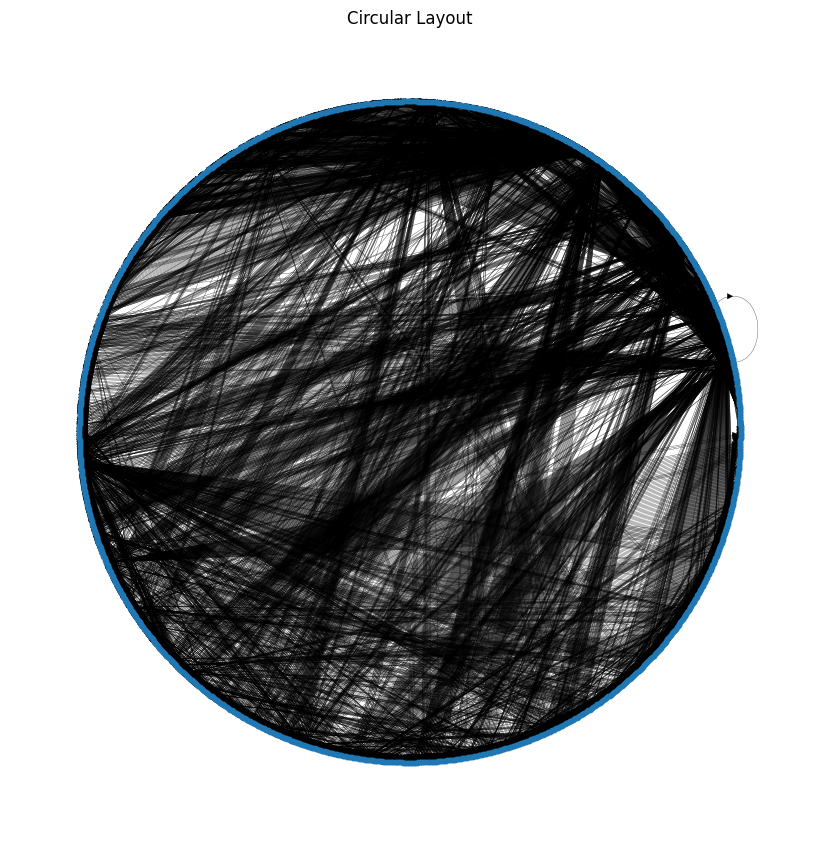

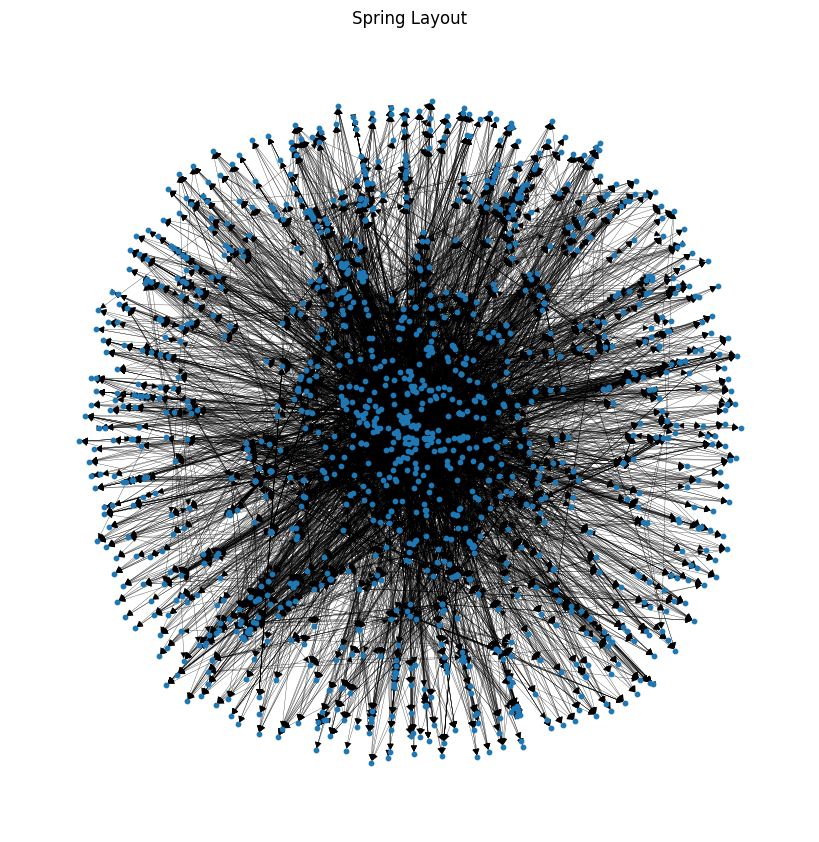

In [ ]:
import matplotlib.pyplot as plt

# Circular layout
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=False, node_size=10, width=0.2, pos=nx.circular_layout(graph))
plt.title("Circular Layout")
plt.savefig("Rede2_circular_layout.png")
plt.show()

# Spring layout
plt.figure(figsize=(8, 8))
nx.draw(graph, with_labels=False, node_size=10, width=0.2, pos=nx.spring_layout(graph))
plt.title("Spring Layout")
plt.savefig("Rede2_spring_layout.png")
plt.show()

In [ ]:
graph_und = graph.to_undirected()

# Remove self-loops from the graph graph_und
graph_und.remove_edges_from(nx.selfloop_edges(graph_und))

print("k-core existentes na rede G_und: ", set([v for k,v in nx.core_number(graph_und).items()]))

k-core existentes na rede G_und:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


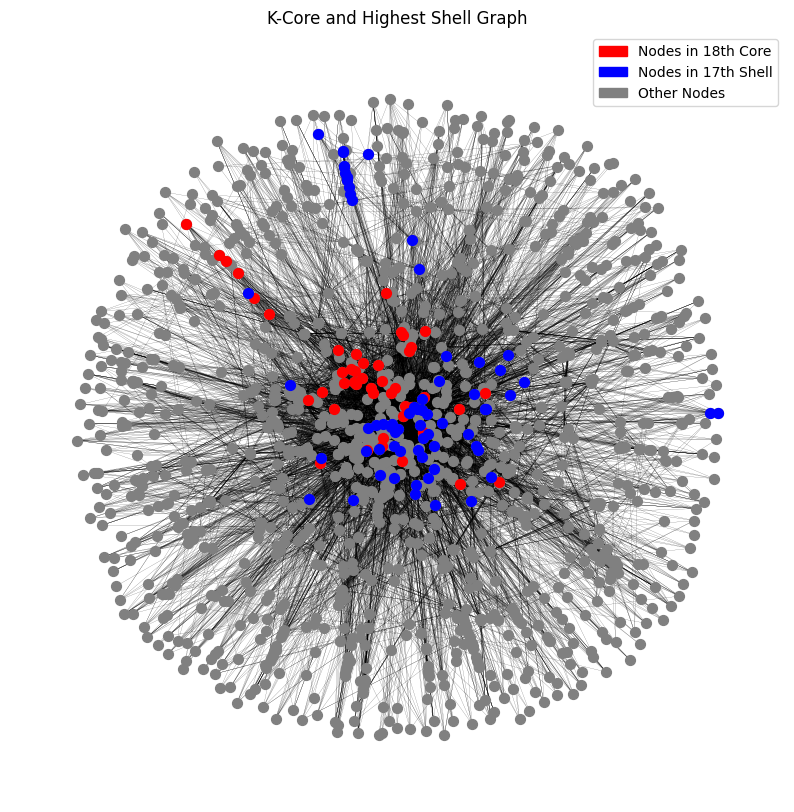

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pos=nx.spring_layout(graph)

k_core = list(nx.k_core(graph_und, 18)) # change the number to change the k-core
k_shell = list(nx.k_shell(graph_und, 17))

# Create a figure and axes
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Draw the entire graph with desired styles
nx.draw(
    graph_und,
    pos=pos,
    node_size=50,  # Increased node size
    width=0.1,  # Very thin edges
    node_color="grey",
    with_labels=False,  # No labels for nodes
    ax=ax,
)

# Highlight k-core nodes in red
nx.draw_networkx_nodes(
    graph_und,
    pos=pos,
    nodelist=k_core,
    node_color="red",
    node_size=50, # Increased node size
    ax=ax,
)

# Highlight highest shell nodes in blue
nx.draw_networkx_nodes(
    graph_und,
    pos=pos,
    nodelist=k_shell,
    node_color="blue",
    node_size=50, # Increased node size
    ax=ax,
)

# Add legend (same as before)
red_patch = mpatches.Patch(color="red", label="Nodes in 18th Core")
blue_patch = mpatches.Patch(color="blue", label="Nodes in 17th Shell")
grey_patch = mpatches.Patch(color="grey", label="Other Nodes")
plt.legend(handles=[red_patch, blue_patch, grey_patch])

# Customize plot appearance (same as before)
plt.axis("off")
plt.title("K-Core and Highest Shell Graph")

# Save and show the plot
plt.savefig("Rede2_k-core_shell.png", transparent=False, dpi=600)
plt.show()

In [ ]:
print("Nodes and degrees in k-core (k=18):")

min_degree_core = float('inf')  # Initialize with infinity to find minimum
for node in k_core:  # Iterate through nodes in k_core
    degree = graph_und.degree(node)  # Get degree from the graph
    print(f"Node: {node}, Degree: {degree}")
    min_degree_core = min(min_degree_core, degree)  # Update minimum degree

print(f"\nMinimum degree in k-core: {min_degree_core}")  # Print minimum degree

print("\n")

# Print nodes and their degrees for k-shell
print("Nodes and degrees in k-shell (k=17):")
min_degree_shell = float('inf')  # Initialize with infinity to find minimum
for node in k_shell:  # Iterate through nodes in k_shell
    degree = graph_und.degree(node)  # Get degree from the graph
    print(f"Node: {node}, Degree: {degree}")
    min_degree_shell = min(min_degree_shell, degree)  # Update minimum degree

print(f"\nMinimum degree in k-shell: {min_degree_shell}")  # Print minimum degree

Nodes and degrees in k-core (k=18):
Node: 35606294400, Degree: 347
Node: 56717204100, Degree: 50
Node: 57201639934, Degree: 18
Node: 57220480392, Degree: 30
Node: 57226123657, Degree: 82
Node: 57226241161, Degree: 46
Node: 15521564300, Degree: 50
Node: 57454497300, Degree: 39
Node: 53879714200, Degree: 32
Node: 58000431900, Degree: 18
Node: 7003831837, Degree: 24
Node: 55513131300, Degree: 18
Node: 57208327846, Degree: 80
Node: 16309023400, Degree: 147
Node: 57454533800, Degree: 45
Node: 56022953900, Degree: 76
Node: 58555442100, Degree: 18
Node: 26321570100, Degree: 56
Node: 7102302907, Degree: 57
Node: 57217063870, Degree: 45
Node: 57222580164, Degree: 33
Node: 7102618949, Degree: 50
Node: 57190952645, Degree: 56
Node: 57694054600, Degree: 65
Node: 25626432200, Degree: 86
Node: 57454516300, Degree: 34
Node: 57998909900, Degree: 18
Node: 59276747600, Degree: 60
Node: 57736226000, Degree: 28
Node: 57221871955, Degree: 66
Node: 57216084309, Degree: 58
Node: 57196795605, Degree: 35
Node:

In [ ]:
# Add 'is_k_core' and 'is_k_shell' columns, initialized to False
datasheet['is_k_core'] = False
datasheet['is_k_shell'] = False

# Iterate through the DataFrame and update the columns based on k_core and k_shell lists
for index, row in datasheet.iterrows():
    node_id = row['Id']
    if node_id in k_core:
        datasheet.loc[index, 'is_k_core'] = True
    if node_id in k_shell:
        datasheet.loc[index, 'is_k_shell'] = True

datasheet

,Id,Label,0,1,2,indegree,outdegree,degree,modularity_class,eigencentrality,stat_inf_class,componentnumber,strongcompnum,is_k_core,is_k_shell
0,57194772911,57194772911,Samanta Mesquita de Holanda,1,False,0,4,4,0,0.000000,1,0,1360,False,False
1,7004474343,7004474343,ADAILDO GOMES D'ASSUNCAO,19,True,1,38,39,0,0.000842,1,0,1359,False,False
2,56573569700,56573569700,I. B.T. da Silva,1,False,2,28,30,0,0.001926,1,0,1358,False,False
3,57216525112,57216525112,Carlos Henrique Nascimento Cordeiro,1,False,3,1,4,0,0.003286,1,0,1,False,False
4,57197124623,57197124623,João Bosco Lucena de Oliveira,1,False,4,0,4,0,0.004958,1,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,59158369800,59158369800,Yuri V.L. de Melo,1,False,1,1,2,11,0.002918,0,0,1347,False,False
1358,6603222705,6603222705,Tarcisio F. Maciel,1,False,2,0,2,11,0.004260,0,0,1346,False,False
1359,57226635570,57226635570,Wellerson Oliveira,1,False,3,0,3,11,0.010158,0,0,12,False,False
1360,57196081200,57196081200,Bruno Jacome Cavalcanti,1,False,1,0,1,0,0.001118,1,0,1344,False,False


In [ ]:
# Display datasheet rows where 'is_k_core' or 'is_k_shell' is True
filtered_datasheet = datasheet[(datasheet['is_k_core'] == True) | (datasheet['is_k_shell'] == True)]
print(filtered_datasheet)

print(len(k_shell)+len(k_core))

               Id        Label                                        0   1  \
8     57216582037  57216582037                              Daniel Flor   1   
12     6603844872   6603844872           VICENTE ANGELO DE SOUSA JUNIOR   8   
31    57222580164  57222580164                 Hertz Wilton Castro Lins   1   
35    16309023400  16309023400  ANTONIO LUIZ PEREIRA DE SIQUEIRA CAMPOS  15   
41     7102618949   7102618949                 ADRIAO DUARTE DORIA NETO  19   
...           ...          ...                                      ...  ..   
1186  57764581800  57764581800                     Alexandre R. Caitano   1   
1189  57998909900  57998909900                      Gabriel M.C. Barros   1   
1190  57201639934  57201639934                        Ellen K.L. Morais   1   
1191  58000431900  58000431900                      Melise C.D. Almeida   1   
1192   7003831837   7003831837                               Lúcio Gama   1   

          2  indegree  outdegree  degree  modularit

In [ ]:
from google.colab import files

datasheet.to_csv('k_network.csv', index=False)  # Set index=False to avoid saving the DataFrame index
#files.download('k_network.csv')